In [1]:
import os
import matplotlib.pyplot as plt
from evaluator import Evaluator
from generator import Generator
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from models import NIC
from data_manager import DataManager
from keras.models import load_model

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)
plt.rcParams['image.interpolation'] = 'nearest'

Using TensorFlow backend.


# Data preprocessing

In [2]:
num_epochs = 500
batch_size = 256
PARENT_PATH = r"C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master"
root_path = os.path.join(PARENT_PATH, r"datasets\IAPR_2012")
captions_filename = os.path.join(root_path, 'IAPR_2012_captions.txt')
data_manager = DataManager(data_filename=captions_filename,
                            max_caption_length=30,
                            word_frequency_threshold=2,
                            extract_image_features=False,
                            cnn_extractor='inception',
                            image_directory=os.path.join(root_path, "iaprtc12"),
                            split_data=True,
                            dump_path=os.path.join(root_path + "reprocessed_data")
                          )

In [3]:
data_manager.preprocess()
print(data_manager.captions[0])
print(data_manager.word_frequencies[0:20])

Loading data ...
Loaded 19625 captions
Removing captions longer than 30 ...
Number of files removed: 1047
Current number of files: 18578
Removing words with a frequency less than 2 ...
Number of words removed: 1971
Current number of words: 2166
['a', 'man', 'and', 'a', 'woman', 'are', 'walking', 'hand', 'in', 'hand', 'at', 'a', 'sandy', 'beach', 'at', 'the', 'sea', 'in', 'the', 'foreground']
[['a' '40160']
 ['and' '14910']
 ['in' '14609']
 ['with' '14211']
 ['the' '11373']
 ['on' '9232']
 ['of' '8381']
 ['brown' '6398']
 ['are' '5271']
 ['grey' '5163']
 ['is' '4111']
 ['white' '3594']
 ['green' '3447']
 ['standing' '3447']
 ['foreground' '3228']
 ['blue' '2803']
 ['black' '2697']
 ['at' '2651']
 ['front' '2505']
 ['two' '2455']]


In [4]:
preprocessed_data_path = os.path.join(root_path, "preprocessed_data")
print(root_path)
print(preprocessed_data_path)
generator = Generator(data_path=preprocessed_data_path,
                      batch_size=batch_size)

num_training_samples =  generator.training_dataset.shape[0]
num_validation_samples = generator.validation_dataset.shape[0]
print('Number of training samples:', num_training_samples)
print('Number of validation samples:', num_validation_samples)

C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets\IAPR_2012
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets\IAPR_2012\preprocessed_data
Loading training dataset...
Loading validation dataset...
Loading vocabulary...
Number of training samples: 11889
Number of validation samples: 2973


# NIC model specifications

In [5]:
model = NIC(max_token_length=generator.MAX_TOKEN_LENGTH,
            vocabulary_size=generator.VOCABULARY_SIZE,
            rnn='gru',
            num_image_features=generator.IMG_FEATS,
            hidden_size=256,
            embedding_size=256)

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

print(model.summary())
print('Number of parameters:', model.count_params())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, 32, 2169)     0                                            
__________________________________________________________________________________________________
text_mask (Masking)             (None, 32, 2169)     0           text[0][0]                       
__________________________________________________________________________________________________
image (InputLayer)              (None, 32, 2048)     0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 32, 256)      555520      text_mask[0][0]                  
____________________________________________________________________________________________

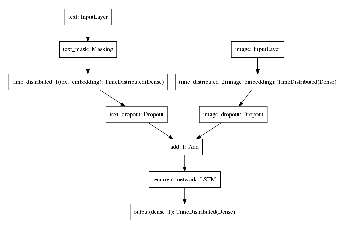

In [6]:
image = plt.imread(os.path.join(PARENT_PATH, "images/NIC.png"))
plt.imshow(image)
plt.axis('off')
plt.show()

# Testing model

In [7]:
print(PARENT_PATH)
root_path = os.path.join(PARENT_PATH, "datasets/IAPR_2012") 
data_path = os.path.join(root_path, 'preprocessed_data')
images_path = os.path.join(root_path, 'iaprtc12')
model_filename = os.path.join(PARENT_PATH, "trained_models/IAPR_2012/iapr_weights.90-1.99.hdf5") 
print(model_filename)
model = load_model(model_filename)
evaluator = Evaluator(model, data_path, images_path)

C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\trained_models/IAPR_2012/iapr_weights.90-1.99.hdf5


C:\Users\nomie\Anaconda3\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


<S>
a
group
of
people
is
sitting
on
a
brown
boat
on
a
lake
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/08/8406.jpg


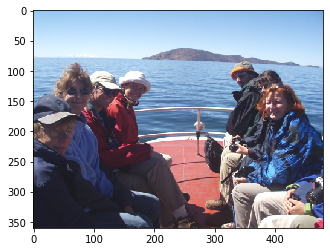

In [8]:
evaluator.display_caption()

<S>
a
face
with
grey
walls
and
standing
terraces
on
terraces
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/08/8195.jpg


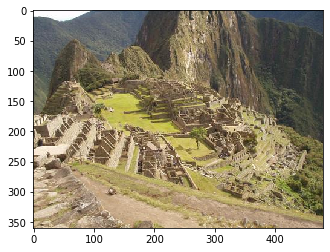

In [9]:
evaluator.display_caption()

<S>
a
cliff
with
a
large
two-storey
and
a
tree
in
the
foreground
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/31/31694.jpg


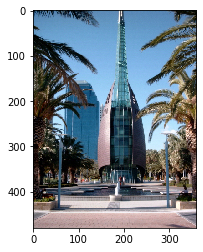

In [10]:
evaluator.display_caption()

<S>
a
grey
and
brown
river
with
a
few
trees
and
a
few
trees
in
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/40/40441.jpg


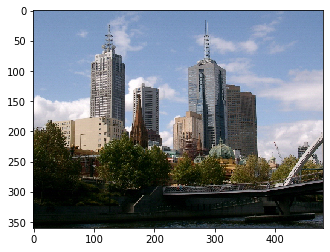

In [11]:
evaluator.display_caption()

<S>
tourists
are
sitting
at
a
long
table
with
a
white
table
concrete
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/09/9251.jpg


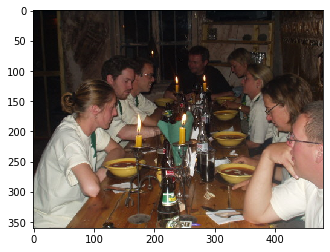

In [12]:
evaluator.display_caption()

<S>
tourists
are
posing
in
front
of
a
grey
wall
with
a
lot
of
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/10/10884.jpg


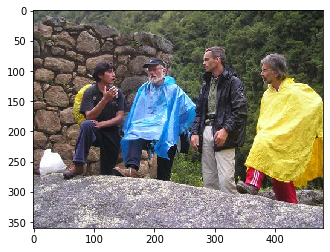

In [13]:
evaluator.display_caption()

## It does not seem to be to good with persons...

<S>
a
onto
rock
bridge
at
the
sea
with
a
onto
rock
nine
and
a
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/33/33494.jpg


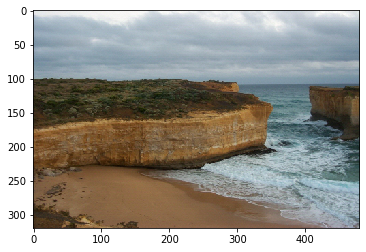

In [14]:
evaluator.display_caption()

<S>
a
river
with
a
dense
domes
on
the
lawn
of
a
river
in
the
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/18/18476.jpg


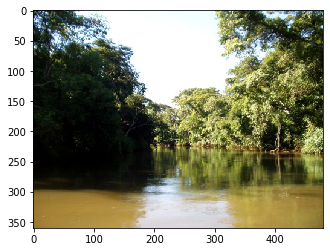

In [15]:
evaluator.display_caption()

<S>
a
man
and
a
woman
are
green
on
a
grey
rock
in
the
foreground
<E>
C:\Users\nomie\Desktop\neural_image_captioning-master\neural_image_captioning-master\datasets/IAPR_2012\iaprtc12 images/16/16501.jpg


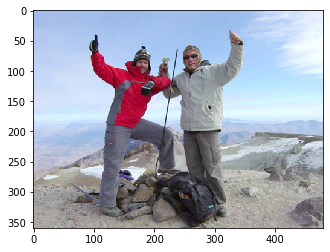

In [16]:
evaluator.display_caption()